<h3 style="text-align:center;font-family:cursive;color:skyblue">GRIP - SPARKS FOUNDATION</h3>
<div style="text-align:center">
<a style="font-family:cursive;color:skyblue" href="#">sparks foundation website</a>
</div>
<p style="text-align:center;font-family:cursive;color:skyblue">DATA SCIENCE AND BUSINESS ANALYTICS INTERSHIP</p>
<p style="text-align:center;font-family:cursive;color:skyblue">TASK1 :- Prediction using Supervised Machine Leaning</p>

<h5 style="font-family:cursive;color:teal;text-align:center">AUTHOR :- HRISHIKESH DATTATRAY KOTHAWADE.</h5>

<div style="text-align:center">
<a style="font-family:cursive;color:skyblue" href="https://github.com/45-Hrishi/TSF-DS-Task1">Github Link</a>
</div>
<div style="text-align:center">
<a style="font-family:cursive;color:skyblue" href="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv">Dataset Link</a>
</div>

<p style="text-align:center;font-family:cursive;color:red">IMPORTING REQUIRED LIBRARIES</p>

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
df = pd.read_csv('task1.csv')

In [253]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [254]:
df.shape

(25, 2)

<p style="text-align:center;font-family:cursive;color:red">CHECKING NULL VALUES</p>

In [255]:
df.isnull().sum()
#Zero null values

Hours     0
Scores    0
dtype: int64

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [257]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<p style="text-align:center;font-family:cursive;color:red">DATA VISUALIZATION</p>

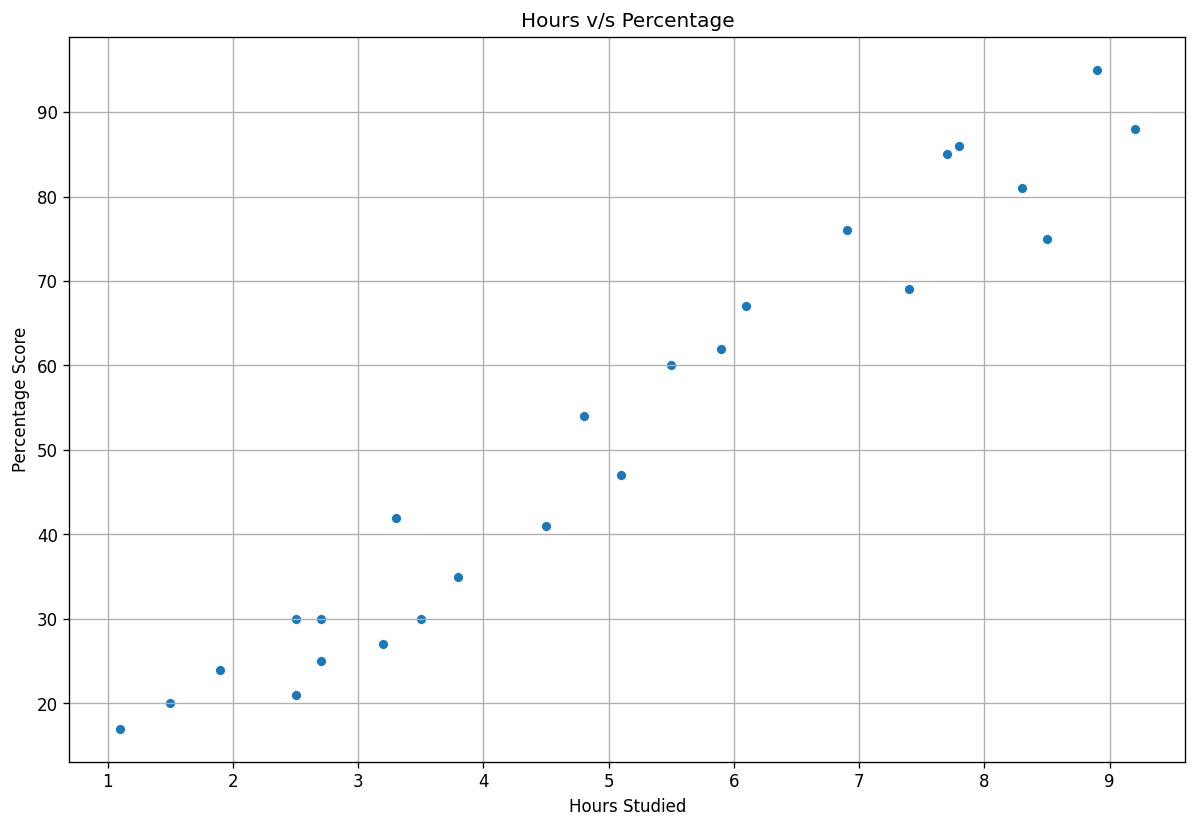

In [258]:
#Data Visualization
plt.figure(figsize=(12,8),dpi=120)
plt.title('Hours v/s Percentage')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
sns.scatterplot(data=df,x=df['Hours'],y=df['Scores'])
plt.grid()

<p style="color:skyblue">From the graph above, we get idea about the relationship of Hours with scores.The relationship is Linear. so we use Linear Regression to create ML model and predict the scores on the basis of Hours of study</p>

<AxesSubplot:>

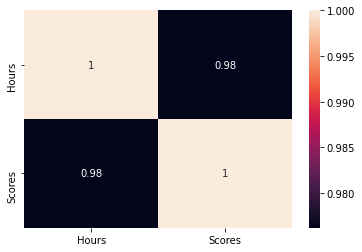

In [259]:
#heatmap for correlation between Hours and score
sns.heatmap(df.corr(),annot=True)

<p style="color:skyblue">From above graph we get idea that Hours and scores has strong positive correlation</p>

<AxesSubplot:title={'center':'Regression Graph'}, xlabel='Hours', ylabel='Scores'>

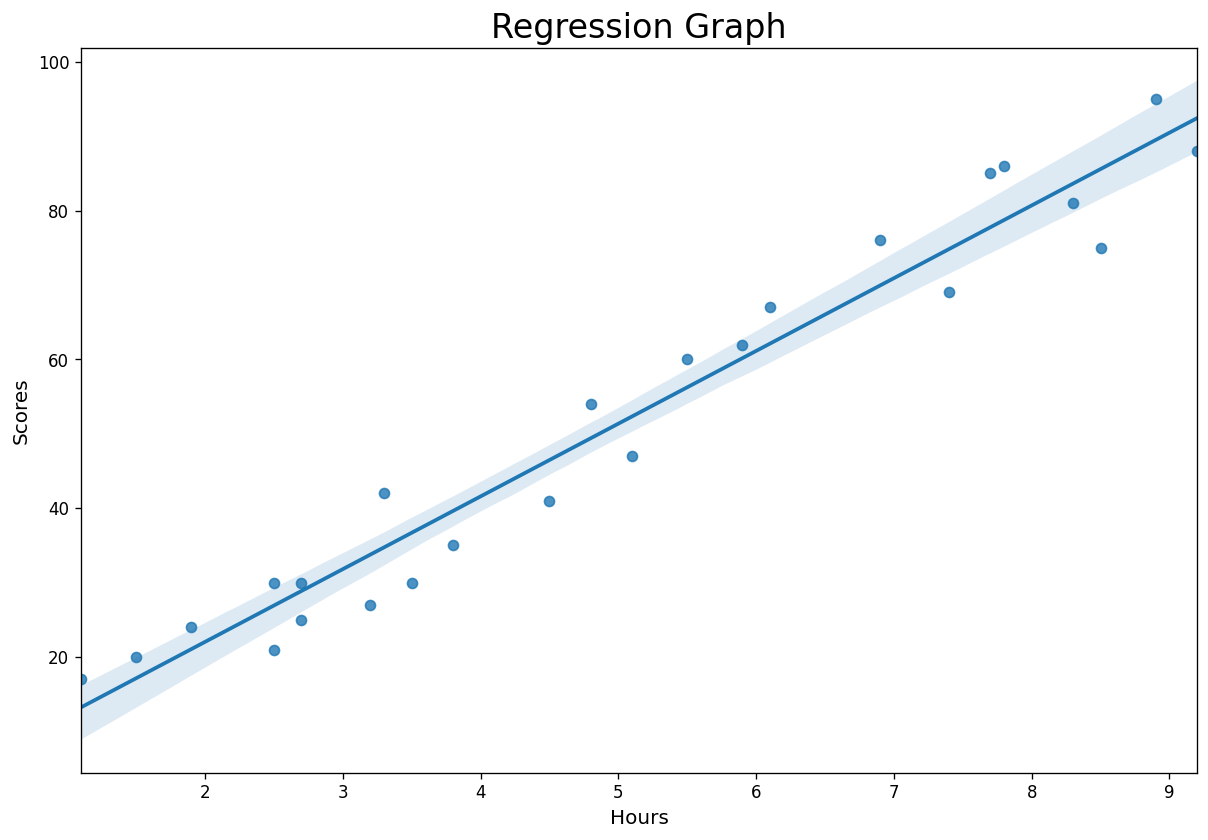

In [260]:
plt.figure(figsize=(12,8),dpi=120)
plt.title('Regression Graph',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
sns.regplot(x= df['Hours'], y= df['Scores'])

<p style="text-align:center;font-family:cursive;color:red">SPLITTING DATA INTO TRAINING AND TESTING DATA</p>

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [262]:
X = df.drop('Scores',axis=1)
y = df['Scores']

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

<p style="text-align:center;font-family:cursive;color:red">LINEAR REGRESSION MODEL CREATION</p>

In [264]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train) 

LinearRegression()

In [265]:
linear_model.coef_

array([9.73330705])

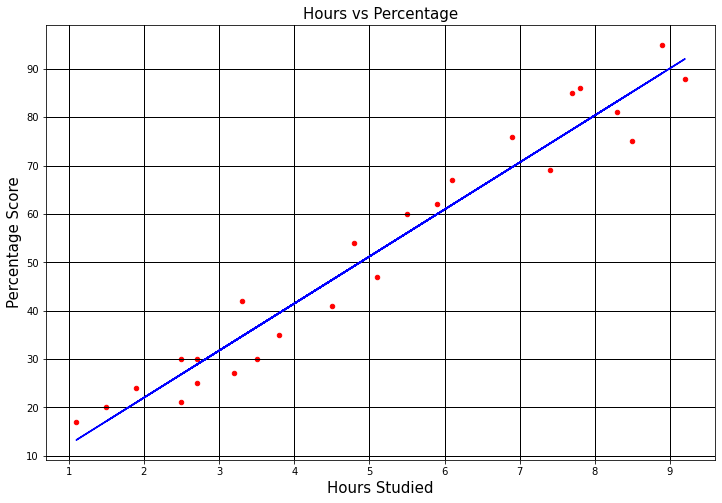

In [266]:
df.plot(kind = 'scatter', x = 'Hours', y = 'Scores', color = 'r',figsize = (12,8))
# y = a*x + b
plt.plot(X_train,linear_model.coef_[0]*X_train + linear_model.intercept_, color = 'b')
plt.title('Hours vs Percentage', size = 15)
plt.xlabel('Hours Studied', size = 15)
plt.ylabel('Percentage Score', size = 15)
plt.grid(b= True, color='k', linestyle='-', linewidth=1)
plt.show()

<p style="text-align:center;font-family:cursive;color:red">PREDICTION USING TESTING DATA</p>

In [267]:
#Prediction
y_pred = linear_model.predict(X_test)
y_pred

array([26.84539693, 77.45859361, 39.4986961 , 74.53860149, 56.04531809])

<p style="text-align:center;font-family:cursive;color:red">EVALUATION OF MODEL</p>

In [268]:
#Evaluation of model
MAE = mean_absolute_error(y_pred,y_test)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
R2_Score = r2_score(y_test,y_pred)

In [269]:
R2_Score

0.9377551740781869

In [270]:
MAE

4.937597792467706

<p style="text-align:center;font-family:cursive;color:red">COMPARISON OF TRUE AND PREDICTED DATA</p>

In [271]:
d = {'y_true': y_test, 'y_pred': y_pred}
com_df = pd.DataFrame(data=d)
com_df = com_df.reset_index()
com_df = com_df.drop('index',axis=1)

<AxesSubplot:title={'center':'True value v/s Predicted value'}, xlabel='Index', ylabel='Scores'>

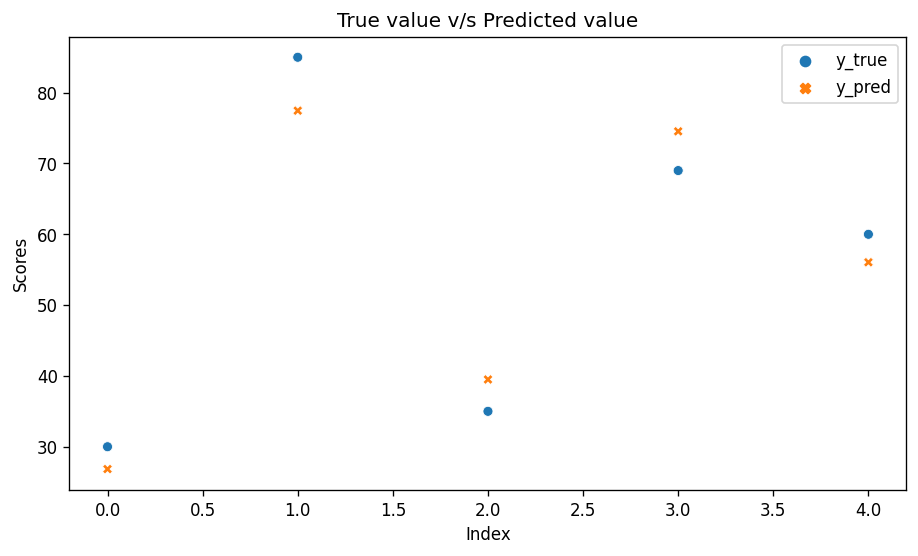

In [272]:
#Visualization of comparison of both y_true and y_pred
plt.figure(figsize=(9,5),dpi=120)
plt.title('True value v/s Predicted value')
plt.xlabel('Index')
plt.ylabel('Scores')
sns.scatterplot(data=com_df)

In [273]:
#Predicting the Percentage based on hours of study
X_test = X_test.reset_index()
X_test = X_test.drop('index',axis=1)
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.rename(columns={0:'Predicted Scores'})
result_pred = pd.concat([X_test, y_pred], axis=1, join='inner')
result_pred

,Hours,Predicted Scores
0,2.5,26.845397
1,7.7,77.458594
2,3.8,39.498696
3,7.4,74.538601
4,5.5,56.045318


In [274]:
y_test = pd.DataFrame(y_test).rename(columns={'Scores':'True Scores'}).reset_index().drop('index',axis=1)
pred_true_result = pd.concat([result_pred,y_test],axis=1,join='inner')
pred_true_result

,Hours,Predicted Scores,True Scores
0,2.5,26.845397,30
1,7.7,77.458594,85
2,3.8,39.498696,35
3,7.4,74.538601,69
4,5.5,56.045318,60


<p style="text-align:center;font-family:cursive;color:red">PREDICTING THE SCORE WITH 9.25 HOURS/DAY</p>

In [276]:
hours = 9.25
linear_model.predict([[hours]])
#predicted score is 92.54
#true score is 89

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92.54521954])

<p style="text-align:center;font-family:cursive;color:yellow">END</p>